# 金融数据科学
## 数据可视化


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

import numpy as np

np.random.seed(1000) # 设置固定的随机数生成器种子，以便重现
y = np.random.standard_normal(20)
x = np.arange(len(y))
plt.plot(x, y)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y.cumsum(), 'b', lw=1.5)
plt.plot(y.cumsum(), 'ro')
plt.grid(True)  # 网格
plt.axis('tight')
plt.xlim(-1, 20)
plt.ylim(np.min(y.cumsum()) - 1, np.max(y.cumsum()) + 1)
plt.title('A simple Plot')
plt.xlabel('Index')
plt.ylabel('Value')

### 二维数据集

In [ ]:
y = np.random.standard_normal((20, 2)).cumsum(axis=0)
plt.figure(figsize=(10, 6))
plt.plot(y, lw=1.5)
plt.plot(y, 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.legend(loc=0) # 将图例放在“最佳”位置
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot');

In [ ]:
y[:, 0] = y[:, 0] * 100
plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots()
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=8)
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')

ax2 = ax1.twinx() # 共享 x 轴
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd')

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.ylabel('value')
plt.title('A Simple Plot')

plt.subplot(212)
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('1st Data Set')

plt.subplot(122)
plt.bar(np.arange(len(y)), y[:, 1], width=0.5,
color='g', label='2nd')
plt.legend(loc=0)
plt.xlabel('index')
plt.title('2nd Data Set');

In [ ]:
y = np.random.standard_normal((1000, 2))
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], marker='o')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot');

In [ ]:
c = np.random.randint(0, 10, len(y))
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], c=c, cmap='coolwarm', marker='o')
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], bins=25)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency') 
plt.title('Histogram');

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],
        stacked=True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(y)
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')

In [ ]:
def func(x):
    return 0.5 * np.exp(x) + 1


a, b = 0.5, 1.5  # 积分上下限
x = np.linspace(0, 2)
y = func(x)
Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]  # 列表对象，包含表示所绘制多边形坐标的元组对象

from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 1, r'$\int_a^b f(x)\mathrm{d}x$', horizontalalignment='center', fontsize=20) # 积分公式

plt.figtext(0.9, 0.075, '$x$') # 轴标签
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b)) # 刻度标签
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'))

### 静态 3D 绘图

In [ ]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)
# strike[:2].round(1)
iv = (strike - 100) ** 2 / (100 * strike) / ttm
# iv[:5, :3]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)
# 轴标签
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5) # 色卡条

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)  # 从不同的视角进行设置
ax.scatter(strike, ttm, iv, zdir='z', s=25,
           c='b', marker='^')

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')

### 交互式 2D 绘图

In [ ]:
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo

plyo.init_notebook_mode(connected=True)

a = np.random.standard_normal((250, 5)).cumsum(axis=0)
index = pd.date_range('2019-1-1', freq='B', periods=len(a))
df = pd.DataFrame(100 + 5 * a, columns=list('abcde'), index=index)

plyo.iplot(df.iplot(asFigure=True),
           # image='png',
           filename='ply_01')


In [ ]:
plyo.iplot(
    df[['a', 'b']].iplot(asFigure=True,
                         theme='polar',
                         title='A Time Series Plot',
                         xTitle='date',
                         yTitle='value',
                         mode={'a': 'markers', 'b': 'lines+markers'},
                         symbol={'a': 'circle', 'b': 'diamond'},
                         size=3.5,
                         colors={'a': 'blue', 'b': 'magenta'},
                         ),
    # image='png',
    filename='ply_02'
)

In [ ]:
plyo.iplot(
    df.iplot(kind='hist', subplots=True, bins=15, asFigure=True),
    # image='png',
    filename='ply_03'
)

In [ ]:
raw = pd.read_csv('./source/fxcm_eur_usd_eod_data.csv', index_col=0, parse_dates=True)
quotes = raw[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']]
quotes = quotes.iloc[-60:]
qf = cf.QuantFig(quotes,
                 title='EUR/USD Exchange Rate',
                 legend='top',
                 name='EUR/USD'
                 )

plyo.iplot(
    qf.iplot(asFigure=True),
    # image='png',
    filename='qf_01'
)

In [ ]:
qf.add_bollinger_bands(periods=15, boll_std=2)
plyo.iplot(qf.iplot(asFigure=True),
           # image='png',
           filename='qf_02'
           )

In [ ]:
qf.add_rsi(periods=14, showbands=False)
plyo.iplot(
    qf.iplot(asFigure=True),
    # image='png',
    filename='qf_03'
)

## 金融时间序列

In [ ]:
import numpy as np
import pandas as pd
from pylab import mpl, plt

plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

filename = './source/tr_eikon_eod_data.csv'
f = open(filename, 'r')
data = pd.read_csv(filename, index_col=0, parse_dates=True)
data.plot(figsize=(10, 12), subplots=True);

In [ ]:
# 数据来自 Thomson Reuters (TR) Eikon Data API。TR 金融工具代码称作路透金融工具代码(RIC)
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate', 'Gold Price', 'VanEck Vectors Gold Miners ETF', 'SPDR Gold Trust']
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

In [ ]:
data.aggregate(['min','mean', 'std', 'median', 'max']).round(2)

In [ ]:
data.diff().head()

In [ ]:
data.pct_change(fill_method=None).mean().plot(kind='bar', figsize=(10, 6));

In [ ]:
rets = np.log(data / data.shift(1))
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

In [ ]:
data.resample('W', label='right').last().head()
data.resample('ME', label='right').last().head()

In [ ]:
rets.cumsum().apply(np.exp). resample('ME', label='right').last( ).plot(figsize=(10, 6));

In [ ]:
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
window = 20
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)

In [ ]:
data['SMA_short'] = data[sym].rolling(window=42).mean() # 短期 SMA 值
data['SMA_long'] = data[sym].rolling(window=252).mean() # 长期 SMA 值
data[[sym, 'SMA_short', 'SMA_long']].plot(figsize=(10, 6))

In [ ]:
data.dropna(inplace=True)
data['positions'] = np.where(data['SMA_short'] > data['SMA_long'], 1,-1)
ax = data[[sym, 'SMA_short', 'SMA_long', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
# 得出的交易策略只能导致少数交易:只有在头寸值变化(两条线发生交叉)时才 进行交易

### 相关分析

In [ ]:
raw = pd.read_csv('./source/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = raw[['.SPX', '.VIX']].dropna()
data.loc[:'2014-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));

In [ ]:
rets = np.log(data / data.shift(1))
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6));

In [ ]:
pd.plotting.scatter_matrix(rets, alpha=0.2,diagonal='hist',  hist_kwds={'bins': 35}, figsize=(10, 6));

In [ ]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)

In [ ]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r')

### 高频数据

In [ ]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('./source/fxcm_eur_usd_tick_data.csv', index_col=0, parse_dates=True)

tick['Mid'] = tick.mean(axis=1)
tick['Mid'].plot(figsize=(10, 6));

In [ ]:
tick_resam = tick.resample(rule='5min', label='right').last()
tick_resam['Mid'].plot(figsize=(10, 6))

## 输入/输出操作
### Python基本I/O

In [ ]:
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

import pickle
import numpy as np
from random import gauss

a = [gauss(1.5, 2) for i in range(1000000)]
path = './saves/'
pkl_file = open(path + 'data.pkl', 'wb')
%time pickle.dump(a, pkl_file)
pkl_file.close()

In [ ]:
ll $path*

In [ ]:
pkl_file = open(path + 'data.pkl', 'rb')
%time b = pickle.load(pkl_file)


In [ ]:
np.allclose(np.array(a), np.array(b)) # 验证两个对象是否包含相同的数据(数值)
pkl_file.close()

#### 读取和写入文本文件

In [ ]:
import pandas as pd

rows = 5000
a = np.random.standard_normal((rows, 5)).round(4)
t = pd.date_range(start='2019/1/1', periods=rows, freq='h')

csv_file = open(path + 'data.csv', 'w')
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '{},{},{},{},{},{}\n'.format(t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [ ]:
csv_file = open(path + 'data.csv', 'r')
for i in range(5):
    print(csv_file.readline(), end='')
# content = csv_file.readlines()
csv_file.close()

In [ ]:
import csv

with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.reader(f)
    lines = [line for line in csv_reader]
lines[:5]

In [ ]:
with open(path + 'data.csv', 'r') as f: 
    csv_reader = csv.DictReader(f)
    lines = [line for line in csv_reader]
lines[:3]

In [ ]:
!rm -f $path*

In [ ]:
import sqlite3 as sq3

con = sq3.connect(path + 'numbs.db')
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'
con.execute(query)
con.commit()

q = con.execute
q('SELECT * FROM sqlite_master').fetchall()

In [ ]:
import datetime

now = datetime.datetime.now()
q('INSERT INTO numbs VALUES(?, ?, ?)', (now, 0.12, 7.3))

np.random.seed(100)
data = np.random.standard_normal((10000, 2)).round(4)
%time
for row in data:
    now = datetime.datetime.now()
q('INSERT INTO numbs VALUES(?, ?, ?)', (now, row[0], row[1])) 
con.commit()

print(now)

In [ ]:
q('SELECT * FROM numbs WHERE no1 > 0.5').fetchmany(4)

In [ ]:
pointer = q('SELECT * FROM numbs')
for i in range(3):
    print(pointer.fetchone())
rows = pointer.fetchall()
rows[:3]

In [ ]:
q('DROP TABLE IF EXISTS numbs')
q('SELECT * FROM sqlite_master').fetchall()

In [ ]:
con.close()
!rm -f $path*

In [ ]:
dtimes = np.arange('2019-01-01 10:00:00', '2025-12-31 22:00:00', dtype='datetime64[m]')
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype=dty)
data['Date'] = dtimes
a = np.random.standard_normal((len(dtimes), 2)).round(4)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]
%time np.save(path + 'array', data)

In [ ]:
%time np.load(path + 'array.npy')

In [ ]:
!rm -f $path*

#### 使用 SQL 数据库

In [ ]:
filename = path + 'numbers'
con = sq3.Connection(filename + '.db')
query = 'CREATE TABLE numbers (No1 real, No2 real,\ No3 real, No4 real, No5 real)'
q = con.execute
qm = con.executemany
q(query)
%%time
qm('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

In [ ]:
%%time
temp = q('SELECT * FROM numbers').fetchall()

In [ ]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(q(query).fetchall()).round(3)
res = res[::100]
plt.figure(figsize=(10, 6))
plt.plot(res[:, 0], res[:, 1], 'ro')

#### 从 SQL 到 pandas

In [ ]:
%time data = pd.read_sql('SELECT * FROM numbers', con)

In [ ]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

In [ ]:
%%time
q = '(No1 < -0.5 | No1 > 0.5) & (No2 < -1 | No2 > 1)'
res = data[['No1', 'No2']].query(q)
plt.figure(figsize=(10, 6))
plt.plot(res['No1'], res['No2'], 'ro')

In [ ]:
h5s = pd.HDFStore(filename + '.h5s', 'w')
%time h5s['data'] = data
h5s.close()

In [ ]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
data_ = h5s['data']
h5s.close()

## 高性能的Python

In [ ]:
def fib_rec_py1(n):
    if n < 2:
        return n
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

%time fib_rec_py1(35)


In [ ]:
import numpy as np

def average_np(n):
    s = np.random.random(n)
    return s.mean()

n =10000000
%time average_np(n)

In [ ]:
import numba

def average_py(n):
    s=0
    for i in range(n):
        s += random.random()
    return s / n

average_nb = numba.jit(average_py)
%time average_nb(n)

In [ ]:
import numba

def fib_rec_py1(n):
    if n < 2:
        return n
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

fib_rec_nb = numba.jit(fib_rec_py1)
%time fib_rec_nb(35)

In [ ]:
%load_ext Cython

%%cython

def fib_rec_cy(int n):
    if n < 2:
        return n
    else:
        return fib_rec_cy(n - 1) + fib_rec_cy(n - 2)

%time fib_rec_cy(35)

In [ ]:
from functools import lru_cache as cache

@cache(maxsize=None)
def fib_rec_py2(n):
    if n < 2:
        return n
    else:
        return fib_rec_py2(n - 1) + fib_rec_py2(n - 2)

%time fib_rec_py2(35)
%time fib_rec_py2(120)

In [ ]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n + 1):
        x, y = y, x + y

    return x

%time fib_it_py(80)

In [ ]:
fib_it_nb = numba.jit(fib_it_py)
%time fib_it_nb(80)

In [ ]:
%load_ext Cython

%%cython

print('hello')

# def fib_it_cy1(int n):
#     cdef long i
#     cdef long x = 0, y = 1
#     for i in range(1, n + 1):
#         x, y = y, x + y
#     return x
# %time fib_it_cy1(80)

#### π

(-1.1, 1.1)

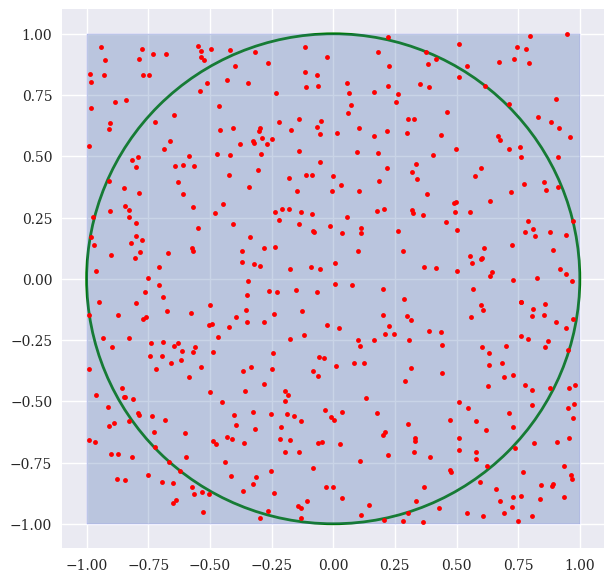

In [49]:
import random
import numpy as np
from pylab import mpl, plt

plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

rn = [(random.random() * 2 - 1, random.random() * 2 - 1) for _ in range(500)]
rn = np.array(rn)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='g', lw=2.0, facecolor='None')
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:, 0], rn[:, 1], 'r.')
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)

In [50]:
n = int(1e7)
%time rn = np.random.random((n, 2)) * 2 - 1
%time distance = np.sqrt((rn ** 2).sum(axis=1))
%time frac = (distance <= 1.0).sum() / len(distance)
pi_mcs = frac * 4
pi_mcs

CPU times: user 188 ms, sys: 45.1 ms, total: 234 ms
Wall time: 313 ms
CPU times: user 191 ms, sys: 93.8 ms, total: 285 ms
Wall time: 289 ms
CPU times: user 11.8 ms, sys: 2.47 ms, total: 14.3 ms
Wall time: 14.3 ms


3.1409168

#### 二叉树

In [53]:
import math

S0 = 36. # 风险资产初始价值
T = 1.0 # 二叉树模拟的时间范围
r = 0.06 # 恒定的短期利率
sigma = 0.2 # 恒定的波动率因数

def simulate_tree(M):
    dt = T / M # 时间间隔
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u # 向上和向下运动因数
    S = np.zeros((M + 1, M + 1))
    S[0, 0] = S0
    z = 1

    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t - 1] * u
            S[i + 1, t] = S[i, t - 1] * d
        z += 1

    return S

np.set_printoptions(formatter={'float':lambda x: '%6.2f' % x})
simulate_tree(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

## 数学工具

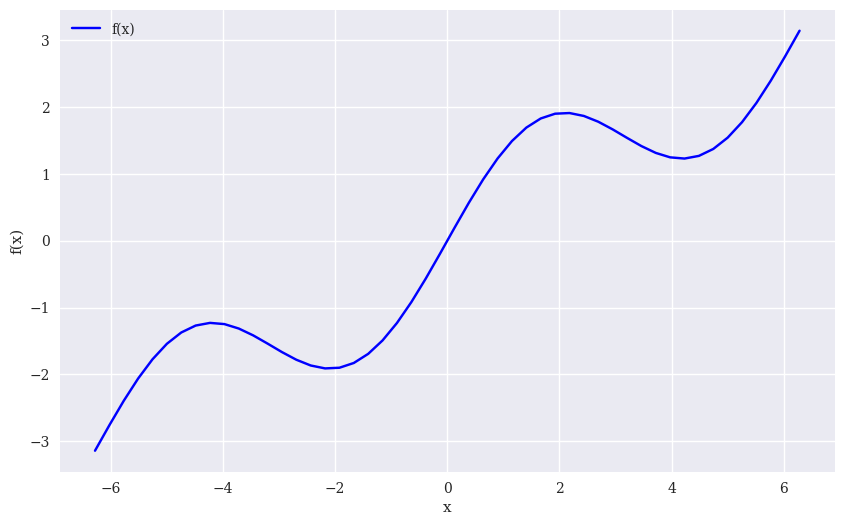

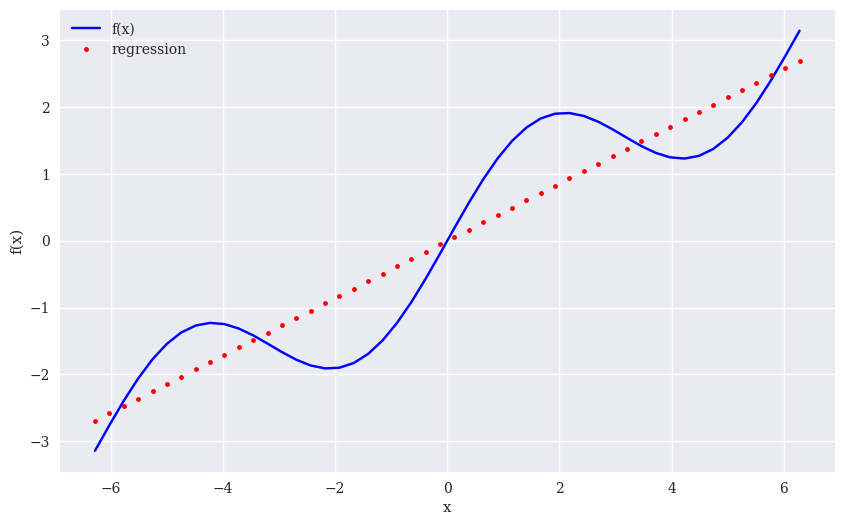

In [56]:
import numpy as np
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

def f(x):
    return np.sin(x) + 0.5 * x

def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

x = np.linspace(-2 * np.pi, 2 * np.pi, 50)
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

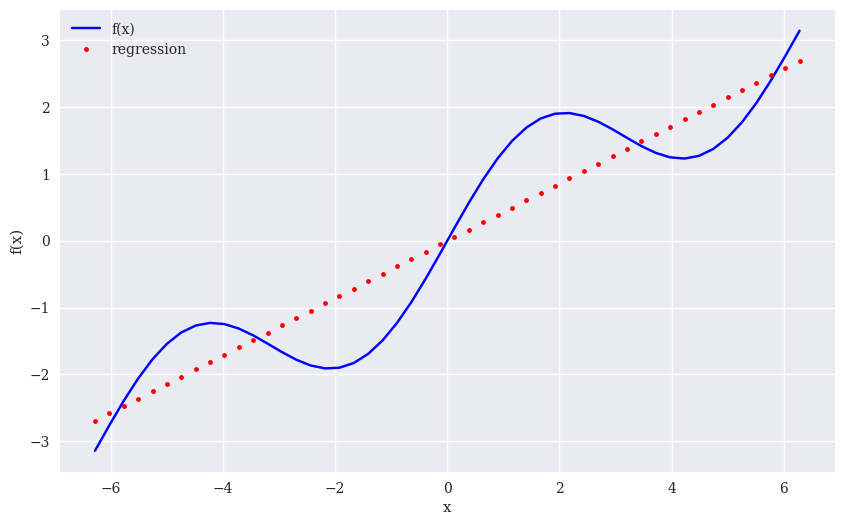

In [57]:
res = np.polyfit(x, f(x), deg=1, full=True)
ry = np.polyval(res[0], x)
create_plot([x, x], [f(x), ry], ['b', 'r.'],['f(x)', 'regression'], ['x', 'f(x)'])


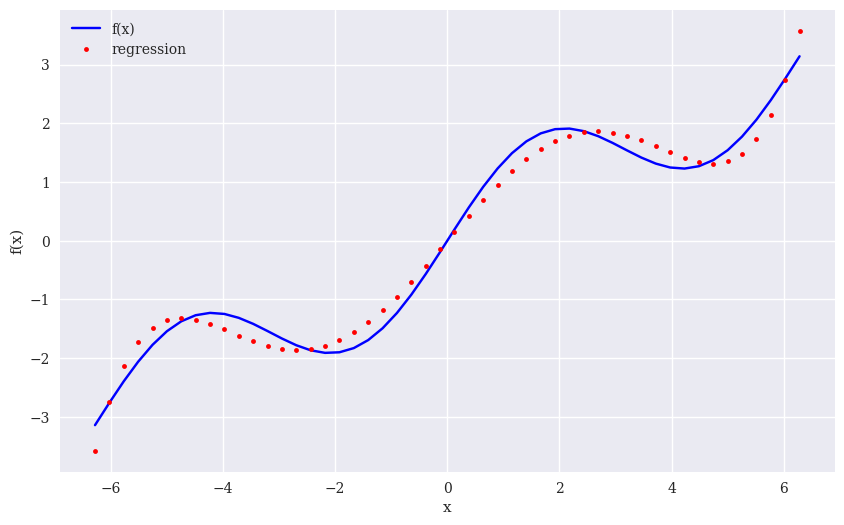

In [58]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)
create_plot([x, x], [f(x), ry], ['b', 'r.'],['f(x)', 'regression'], ['x', 'f(x)'])

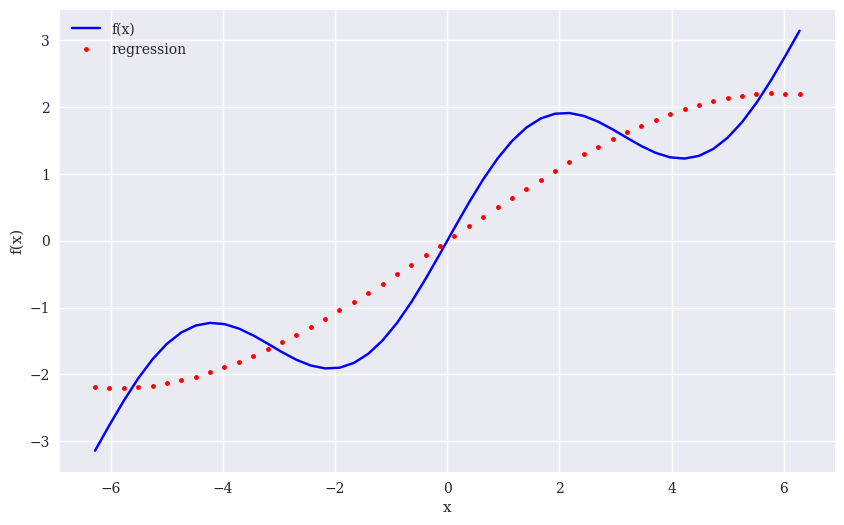

In [59]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]
ry = np.dot(reg, matrix)
create_plot([x, x], [f(x), ry], ['b', 'r.'],['f(x)', 'regression'], ['x', 'f(x)'])